In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from src.data_loader    import create_df
from src.training       import create_variables


df_model_rf = create_df('clean_data')


X_train, X_test, y_train, y_test = create_variables(df_model_rf)

In [2]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de parámetros a buscar
param_grid = {
    # Número de árboles: probar entre 100 (por defecto) y 500
    'n_estimators': [100, 200, 500],

    # Profundidad máxima: 5, 10 o dejar que crezca sin límite (None)
    'max_depth': [5, 10, None],

    # Mínimo de muestras por hoja: 1 (por defecto), 5 o 10
    'min_samples_leaf': [1, 5, 10]
}

# Inicializar GridSearchCV: scoring='accuracy' para maximizar la precisión
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42,class_weight='balanced_subsample'),
    param_grid=param_grid,
    scoring='recall',
    cv=5,               # 5-fold Cross-Validation
    verbose=2,          # Muestra el progreso
    n_jobs=-1           # Usa todos los núcleos del procesador
)

grid_search.fit(X_train, y_train)

# Guardar los mejores parámetros encontrados y el mejor modelo
best_params = grid_search.best_params_
rf_optimizado = grid_search.best_estimator_

# Predecir con el modelo optimizado
pred = rf_optimizado.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=5, n_e

In [3]:
# Obtener Accuracy final
accuracy_final = accuracy_score(y_test, pred)

# Obtener el reporte de clasificación (incluye Precision y Recall)
reporte_final = classification_report(y_test, pred)

# Simulación de Resultados para el Informe:
print(f"\nAccuracy del Modelo Final Optimizado (X_test): {accuracy_final:.4f}")
print("\nReporte de Clasificación del Modelo Final:")
print(reporte_final)


Accuracy del Modelo Final Optimizado (X_test): 0.8264

Reporte de Clasificación del Modelo Final:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       222
           1       0.47      0.47      0.47        43

    accuracy                           0.83       265
   macro avg       0.68      0.68      0.68       265
weighted avg       0.83      0.83      0.83       265



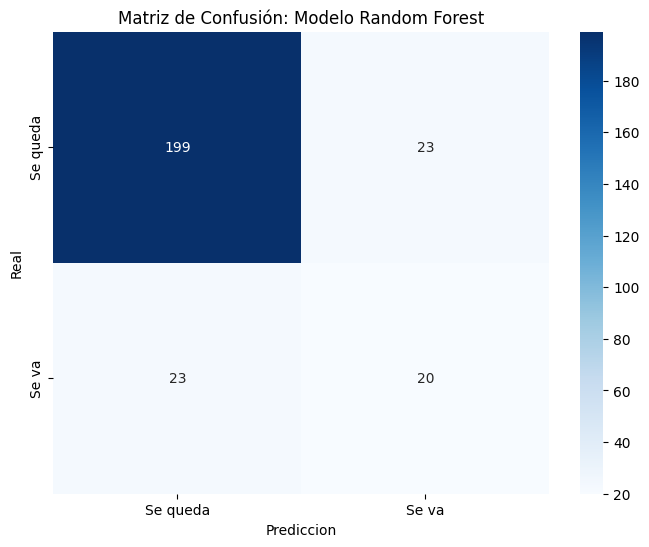

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Calcular la matriz
cm = confusion_matrix(y_test, pred)

# 3. Visualización elegante con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Se queda', 'Se va'],
            yticklabels=['Se queda', 'Se va'])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de Confusión: Modelo Random Forest')
plt.show()

/tmp/ipykernel_1306/3647456134.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(25), palette='viridis')


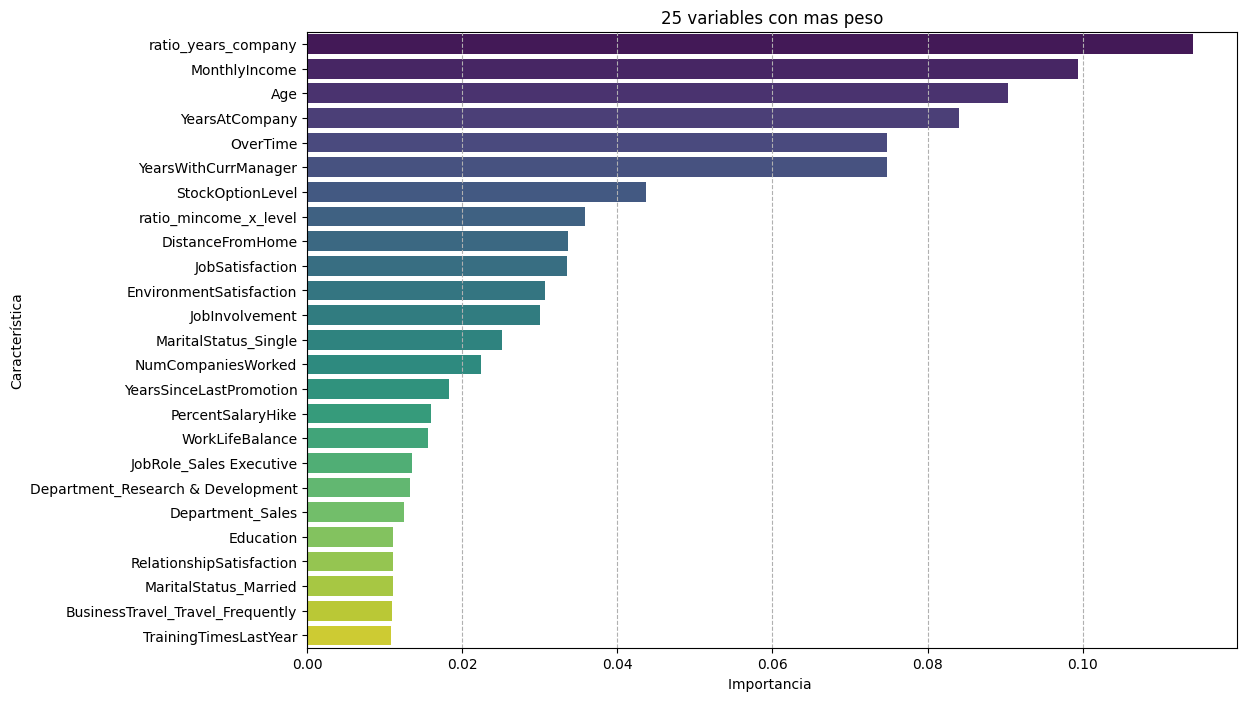

In [5]:
import pandas as pd

feature_importances = rf_optimizado.feature_importances_

# 2. Obtener los nombres de las columnas de X_train
feature_names = X_train.columns

# 3. Crear un DataFrame para visualizar las importancias
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 4. Ordenar el DataFrame por importancia de forma descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(25), palette='viridis')
plt.title('25 variables con mas peso')
plt.xlabel('Importancia ')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--')
plt.show()

# Entreno 2

In [6]:
from sklearn.feature_selection import RFE

X = df_model_rf[importance_df['Feature'].head(15)]
y = df_model_rf['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

grid_search.fit(X_train, y_train)

# Guardar los mejores parámetros encontrados y el mejor modelo
best_params = grid_search.best_params_
rf_optimizado = grid_search.best_estimator_

# Predecir con el modelo optimizado
pred = rf_optimizado.predict(X_test)

# Obtener Accuracy final
accuracy_final = accuracy_score(y_test, pred)

# Obtener el reporte de clasificación (incluye Precision y Recall)
reporte_final = classification_report(y_test, pred)

# Simulación de Resultados para el Informe:
print(f"\nAccuracy del Modelo Final Optimizado (X_test): {accuracy_final:.4f}")
print("\nReporte de Clasificación del Modelo Final:")
print(reporte_final)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.4s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=1, n_estimators=200; total time=   0.7s
[CV] END ..max_depth=5, min_samples_leaf=5, n_e

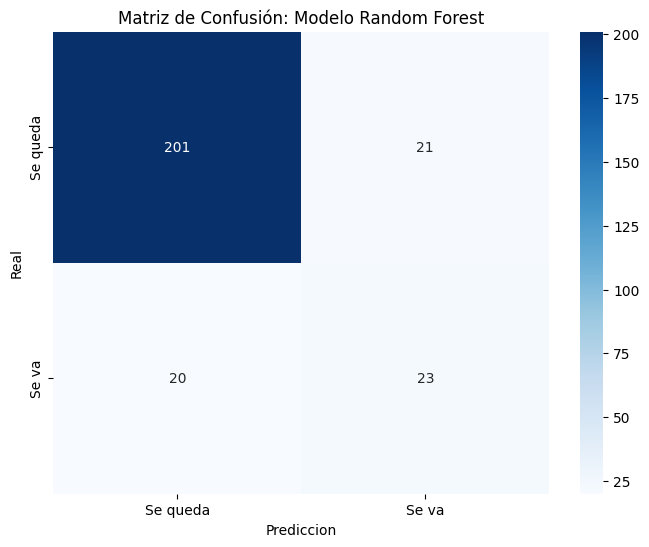

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Calcular la matriz
cm = confusion_matrix(y_test, pred)

# 3. Visualización elegante con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Se queda', 'Se va'],
            yticklabels=['Se queda', 'Se va'])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de Confusión: Modelo Random Forest')
plt.show()

# SMOTE: Desbalanceo de clases

In [8]:
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline as ImPipeline

X = df_model_rf[importance_df['Feature'].head(15)]
y = df_model_rf['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Modifica tu pipeline para incluir el selector
pipeline_v2 = ImPipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200, 500],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_leaf': [1, 5, 10]
}

gs_smote = GridSearchCV(
    estimator=pipeline_v2,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    verbose=2,
    n_jobs=-1
)

gs_smote.fit(X_train, y_train)

# Predecir con el modelo optimizado
pred_smote = gs_smote.predict(X_test)

# Obtener Accuracy final
accuracy_final = accuracy_score(y_test, pred_smote)

# Obtener el reporte de clasificación (incluye Precision y Recall)
reporte_final = classification_report(y_test, pred_smote)

# Simulación de Resultados para el Informe:
print(f"\nAccuracy del Modelo Final Optimizado (X_test): {accuracy_final:.4f}")
print("\nReporte de Clasificación del Modelo Final:")
print(reporte_final)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.7s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.7s
[CV] END rf__max_depth=5, rf__min_samples_leaf=1, rf__n_estimators=200; total time=   0.8s
[CV] END rf__max_depth=5, rf__min_samples_leaf=5, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf__min_samples_leaf=5, rf__n_estimators=100; total time=   0.4s
[CV] END rf__max_depth=5, rf

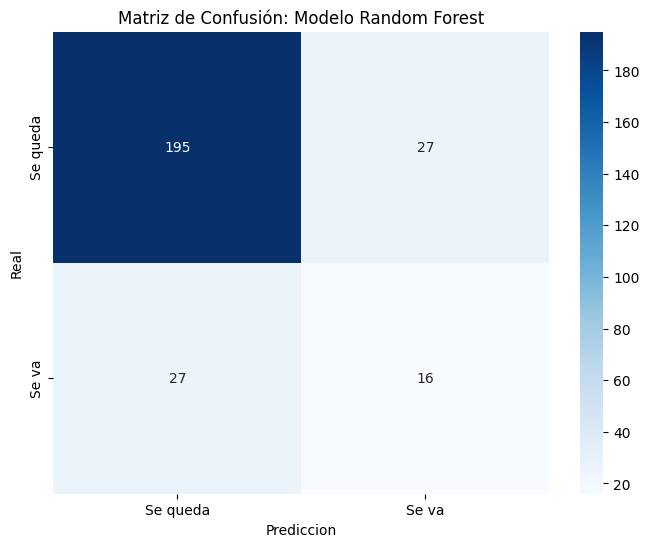

In [9]:
# 2. Calcular la matriz
cm = confusion_matrix(y_test, pred_smote)

# 3. Visualización elegante con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Se queda', 'Se va'],
            yticklabels=['Se queda', 'Se va'])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de Confusión: Modelo Random Forest')
plt.show()